In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

In [4]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
    zip_ref.extractall("titanic_data")


In [6]:
train=pd.read_csv('titanic_data/train.csv')
test=pd.read_csv('titanic_data/test.csv')
submission=pd.read_csv('titanic_data/gender_submission.csv')

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


Survived
0    549
1    342
Name: count, dtype: int64


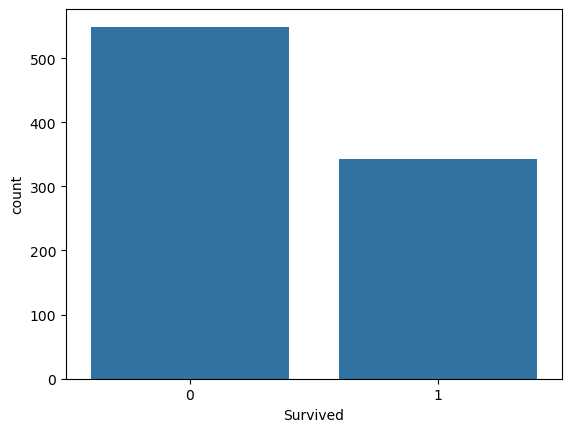

In [7]:
sns.countplot(x='Survived', data = train)
print(train['Survived'].value_counts())

plt.show()

In [8]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
train.drop('Cabin', axis=1)
test.drop('Cabin', axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


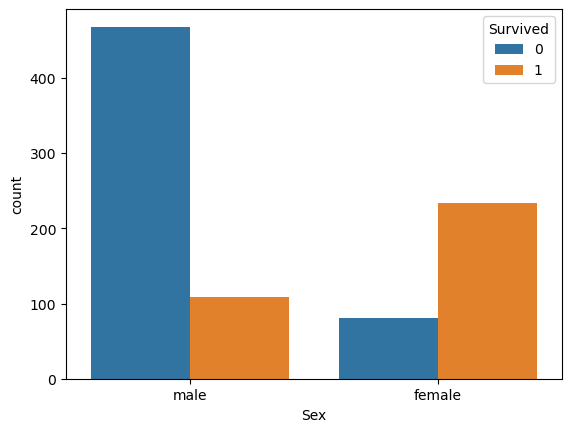

In [10]:
sns.countplot(data= train, x='Sex', hue = 'Survived')
plt.show()

In [11]:
train.loc[train['Sex']=='male', 'Sex']=0
train.loc[train['Sex']=='female','Sex']=1
test.loc[test['Sex']=='male','Sex']=0
test.loc[test['Sex']=='female','Sex']=1

In [12]:
train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

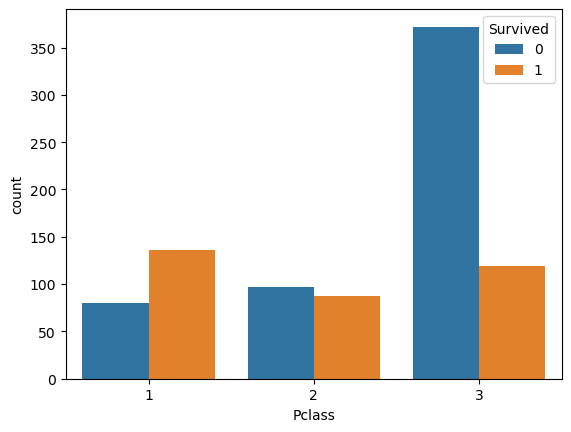

In [13]:
sns.countplot(data=train, x= 'Pclass', hue= 'Survived')
plt.show()

In [14]:
train['Pclass_3']=(train['Pclass']==3)
train['Pclass_2']=(train['Pclass']==2)
train['Pclass_1']=(train['Pclass']==1)

test['Pclass_3']=(test['Pclass']==3)
test['Pclass_2']=(test['Pclass']==2)
test['Pclass_1']=(test['Pclass']==1)

In [15]:
train=train.drop(columns='Pclass')
test=test.drop(columns='Pclass')

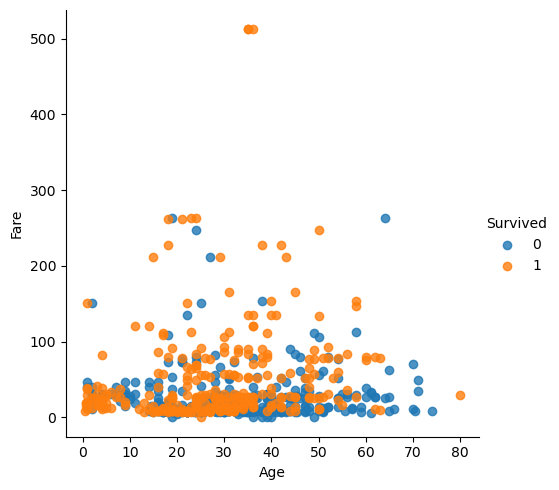

In [16]:
sns.lmplot(data=train, x='Age', y='Fare', fit_reg=False, hue='Survived')
plt.show()

In [17]:
test.loc[test['Fare'].isnull(),'Fare']=0

In [18]:
train=train.drop(columns='Age')
test=test.drop(columns='Age')

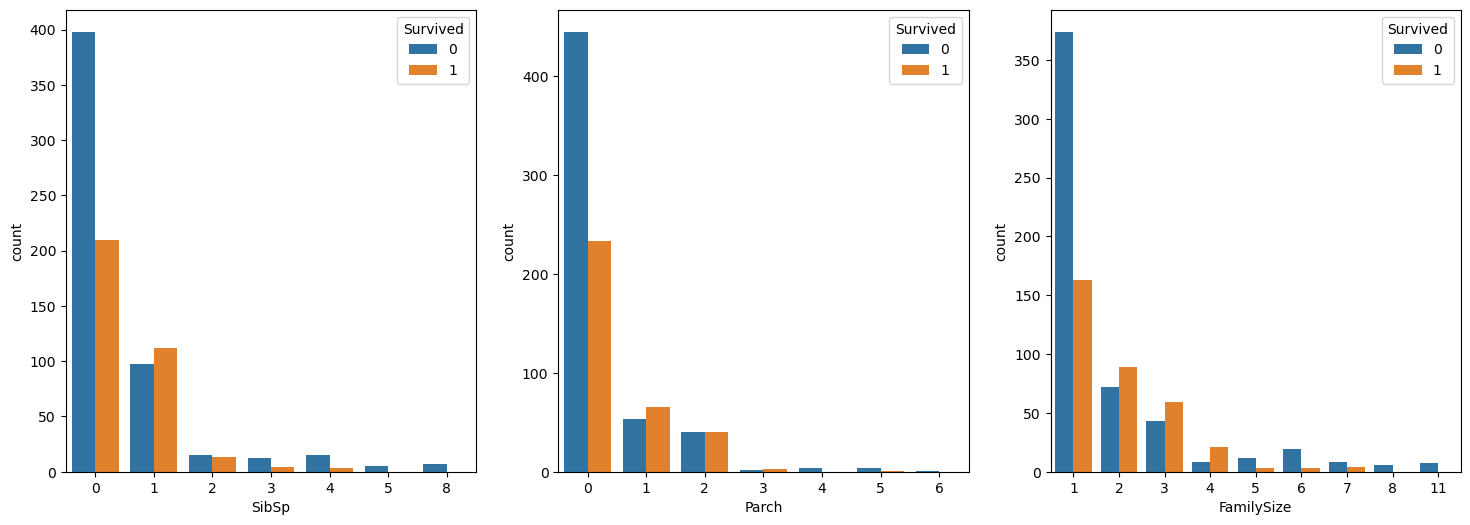

In [19]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax2)
sns.countplot(data=train, x='FamilySize',hue='Survived', ax=ax3)
plt.show()

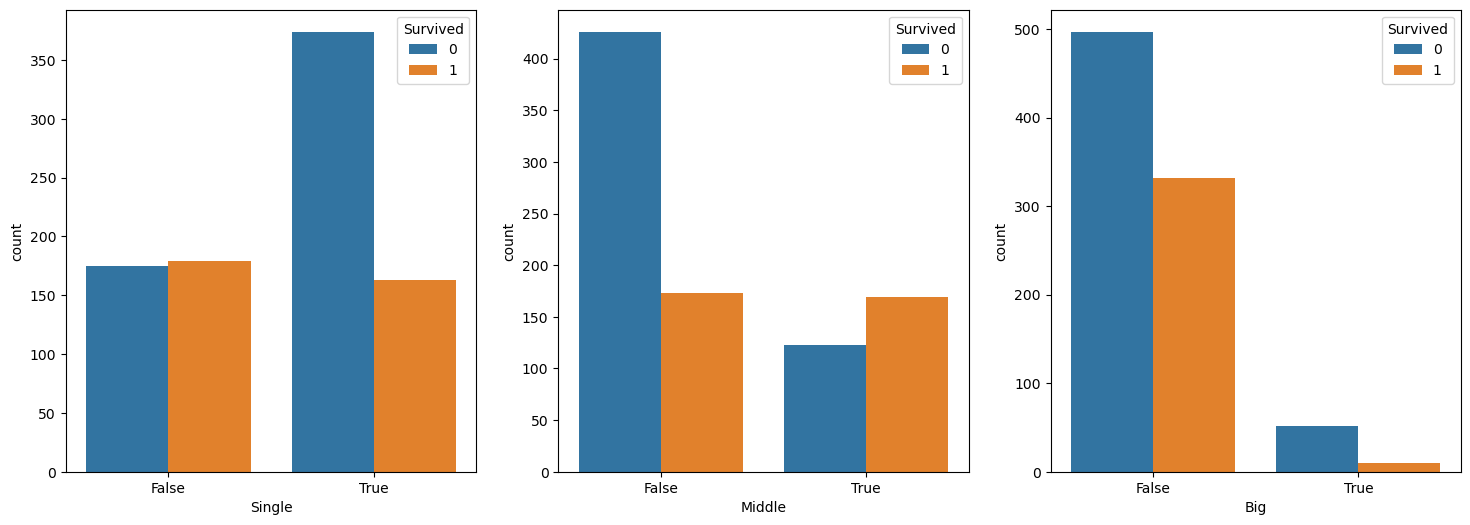

In [20]:
train['Single']=train['FamilySize']==1
train['Middle']=(2<=train['FamilySize']) & (train['FamilySize']<=4)
train['Big']=train['FamilySize']>=5

test['Single']=test['FamilySize']==1
test['Middle']=(2<=test['FamilySize']) & (test['FamilySize']<=4)
test['Big']=test['FamilySize']>=5

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train, x='Single', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Middle', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Big',hue='Survived', ax=ax3)
plt.show()

In [21]:
train=train.drop(columns=['SibSp','Parch','FamilySize','Embarked','Ticket'])
test=test.drop(columns=['SibSp','Parch','FamilySize','Embarked', 'Ticket'])

In [22]:
train=train.drop(columns=['Cabin'])
test=test.drop(columns=['Cabin'])

In [23]:
train=train.drop(columns=['Name'])
test=test.drop(columns=['Name'])

In [24]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = model.predict(X_train)

In [27]:
test_pred = model.predict(test)


In [28]:
print(test.columns)

Index(['PassengerId', 'Sex', 'Fare', 'Pclass_3', 'Pclass_2', 'Pclass_1',
       'Single', 'Middle', 'Big'],
      dtype='object')


In [29]:
import pandas as pd

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})

submission.to_csv('submission.csv', index=False)
